## Exploratory Data Analysis

In this Notebook Exploratory Data Analysis was performed to see main trends in data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
from datetime import timedelta

from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'lot', 'lack', 'one',
                   '_', 'be', 'done', 'rather', 'much', 'know','make',
                  've','us','will','com', 'last', 'also', 'go', 'make', 'much', 'see'])

from wordcloud import WordCloud, STOPWORDS

import ast


Bad key "text.kerning_factor" on line 4 in
C:\Users\anpej\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
# Uploafing main_df_clean dataset
main_df = pd.read_csv('./datasets/main_df_clean.csv')
# Converting list cell calues from string to list
main_df['hashtags'] = main_df['hashtags'].apply(ast.literal_eval)
main_df['post_text'] = main_df['post_text'].apply(ast.literal_eval)
main_df['what_on_photo'] = main_df['what_on_photo'].apply(ast.literal_eval)
main_df['emoji_post_text'] = main_df['emoji_post_text'].apply(ast.literal_eval)
main_df['emoji_comments'] = main_df['emoji_comments'].apply(ast.literal_eval)
main_df['profile_categories'] = main_df['profile_categories'].apply(ast.literal_eval)
# Converting datatype to datetime
main_df['time'] = pd.to_datetime(main_df['time'])

In [4]:
# Printing information about dataset
print('Number of rows:',main_df.shape[0])
print('Number of unique profiles:', len(main_df.profile_name.value_counts()))
print('=============')
print('Number of rows for each profile:')
main_df.profile_name.value_counts()

Number of rows: 241775
Number of unique profiles: 3716
Number of rows for each profile:


hiddenscotland     435
yellowtrace        371
est_living         328
thelocalproject    294
mylifeaseva        288
                  ... 
_.raeed              7
pyr3xliving          6
naimbenhim           6
samsmith             3
elisingz             2
Name: profile_name, Length: 3716, dtype: int64

241775 rows were formed. Each row represent one post from a profile, if post was a carousel (more than one photo/video in one post) each photo was added as a additional row. Number of unique profile is 3716.

In [5]:
# Lookibg for basic statistics
main_df.describe().round().T

,count,mean,std,min,25%,50%,75%,max
num_likes_post,241775.0,55085.0,183628.0,1.0,952.0,5181.0,29070.0,6904405.0
num_views,241775.0,51535.0,480615.0,0.0,0.0,0.0,0.0,63117372.0
num_posts,241775.0,2745.0,3837.0,2.0,691.0,1526.0,3374.0,55126.0
num_followers,241775.0,2142431.0,5871296.0,5168.0,158380.0,382907.0,2817322.0,137086451.0
num_comments,241775.0,661.0,4244.0,0.0,14.0,64.0,285.0,734603.0
female,241775.0,48.0,25.0,0.0,27.0,55.0,69.0,100.0
male,241775.0,45.0,25.0,0.0,28.0,39.0,62.0,100.0
len_post_text,241775.0,267.0,335.0,1.0,61.0,146.0,338.0,2250.0
num_of_unique_hashtags,241775.0,4.0,7.0,0.0,0.0,1.0,3.0,61.0
number_rows,241775.0,78.0,44.0,2.0,51.0,64.0,89.0,435.0


From the above the following information can be seen:

- From each profile mean number of rows in dataset were 78 with range of 2-435 rows per profile. 
- Mean number of likes of all posts is 55085, but median is 5181 (10 times smaller) and standard deviation is 183628. It means that number of like very very. Same applicable for number of views and number of comments.
- The minimum number of followers is 5168, the maximum - 137086451.
- The mean number of females followers slightly more 48% than males 45%.
- In average, instagram users write caption with 267 in it (Instagram allowed 2200 character maximum, Instagram do not count len of tag other accounts in text, punctuation and links as characters).
- Usually, users publish new posts every 12 hours.

In [6]:
main_df['influencer_type'].value_counts()

Macro    113696
Mega      77721
Midi      25515
Micro     24843
Name: influencer_type, dtype: int64

Dataset have much more information about Macro and Mega influencers than other types.

In [7]:
# Looking for statistics by influencers' types
main_df.groupby(['influencer_type']).agg(['mean','std']).round().T

influencer_type                 Macro       Mega    Micro     Midi
num_likes_post         mean    9610.0   156816.0    394.0   1091.0
                       std    17167.0   298622.0    477.0   1661.0
num_views              mean    7973.0   148288.0    180.0    929.0
                       std    56245.0   836724.0   1970.0   7308.0
num_posts              mean    2713.0     3762.0   1037.0   1449.0
                       std     3117.0     5269.0   1250.0   1567.0
num_followers          mean  368103.0  6109012.0  12172.0  40510.0
                       std   196360.0  9161879.0   3983.0  18046.0
num_comments           mean     178.0     1780.0     20.0     34.0
                       std      998.0     7258.0    310.0    197.0
female                 mean      53.0       47.0     26.0     48.0
                       std       23.0       24.0     29.0     24.0
male                   mean      44.0       51.0     28.0     42.0
                       std       22.0       24.0     30.0     23.0
len_post_text          mean     287.0      213.0    305.0    309.0
                       std      354.0      291.0    348.0    340.0
num_of_unique_hashtags mean       4.0        2.0      7.0      5.0
                       std        7.0        5.0     10.0      8.0
number_rows            mean      80.0       78.0     74.0     72.0
                       std       50.0       39.0     34.0     30.0
mean_likes             mean    9610.0   156816.0    394.0   1091.0
                       std    14854.0   266780.0    375.0   1333.0
post_frequency         mean      12.0       11.0     12.0     11.0
                       std        7.0        7.0      7.0      7.0
comments_engagement    mean       0.0        0.0      0.0      0.0
                       std        0.0        0.0      2.0      0.0
like_engagement        mean       2.0        3.0      3.0      3.0
                       std        4.0        4.0      4.0      4.0
polarity_post_txt      mean       0.0        0.0      0.0      0.0
                       std        0.0        0.0      0.0      0.0
subjectivity_post_txt  mean       0.0        0.0      0.0      0.0
                       std        0.0        0.0      0.0      0.0
topic                  mean       7.0        6.0      6.0      6.0
                       std        4.0        4.0      4.0      4.0
hour                   mean      15.0       10.0     14.0     14.0
                       std        5.0        8.0      5.0      5.0
weekaday               mean       3.0        3.0      3.0      3.0
                       std        2.0        2.0      2.0      2.0
weekday                mean       3.0        3.0      3.0      3.0
                       std        2.0        2.0      2.0      2.0
mean_comments          mean     178.0     1780.0     20.0     34.0
                       std      384.0     3788.0     98.0     54.0

Mean number of likes definitely depends on type of influencer, mega usually get 156816, macro 9610, midi 1091 and mini 394 likes. Standard deviations are quite big.

Mega influencers have more posts than others. 

Micro and Midi influensers use more characters in they captions (305 and 309) than Macro and Mega (287, 213).
Also, Micro and Midi influencers use more hashtags than Marco and Mega (7 and 5 vs 4 and 2).

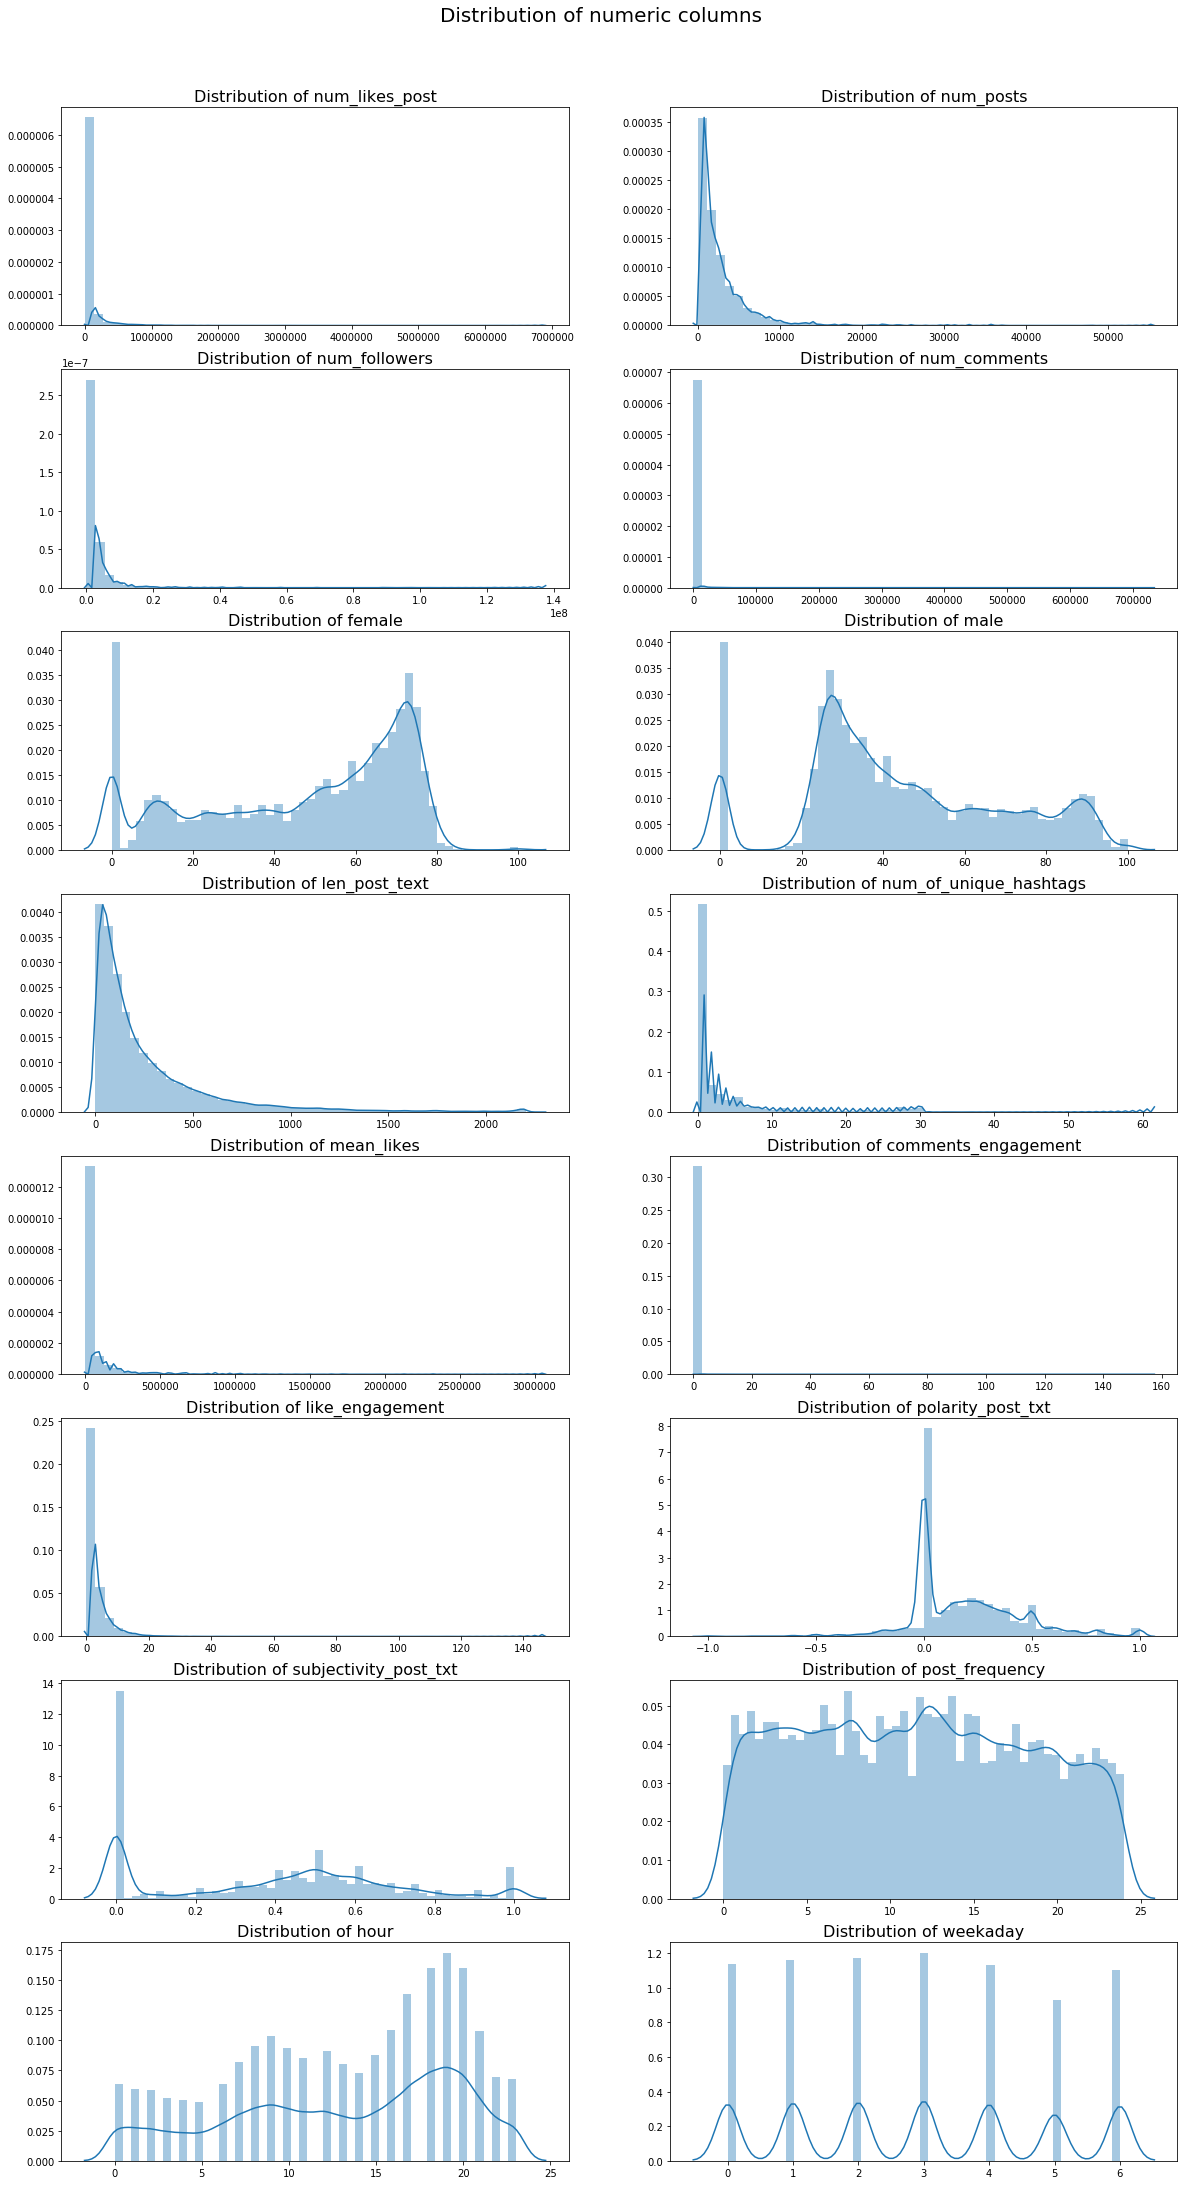

In [8]:
# Distribution of numeric columns
numeric_columns = ['num_likes_post','num_posts','num_followers','num_comments',
'female','male','len_post_text','num_of_unique_hashtags','mean_likes',
'comments_engagement','like_engagement','polarity_post_txt','subjectivity_post_txt',
                   'post_frequency','hour','weekaday']
nrows = int(np.ceil(len(numeric_columns)/2))
fig,ax = plt.subplots(ncols=2,nrows=nrows, figsize=(20,35))
ax = ax.ravel()
for i,column in enumerate(numeric_columns):
    sns.distplot(main_df[column],ax=ax[i])
    ax[i].set_xlabel(' ')
    ax[i].set_title(f'Distribution of {column}',fontsize=16)
    plt.suptitle('Distribution of numeric columns',fontsize=20)
    fig.subplots_adjust(top=0.94);

From the distributions above the high skewness can be noticed in the following columns: 'num_likes_post','num_likes_post','num_views','num_posts','num_followers','num_comments',
'len_post_text','num_of_unique_hashtags','number_rows','mean_likes',
'comments_engagement','like_engagement'.

More accounts has female audience, than male.

Most of caption texts have neutral emotional content or positive content. Only texts have negative content based on sentiment analysis. Subjectivity of caption texts is usually low (that means that most of text are objective). 

People prefer publish their posts with pick in between 5 and 8 p.m and smaller pick at 9 a.m.
Weekday distribute almost uniformly with a bit higher activity on Thursday and lower activity on Saturday.

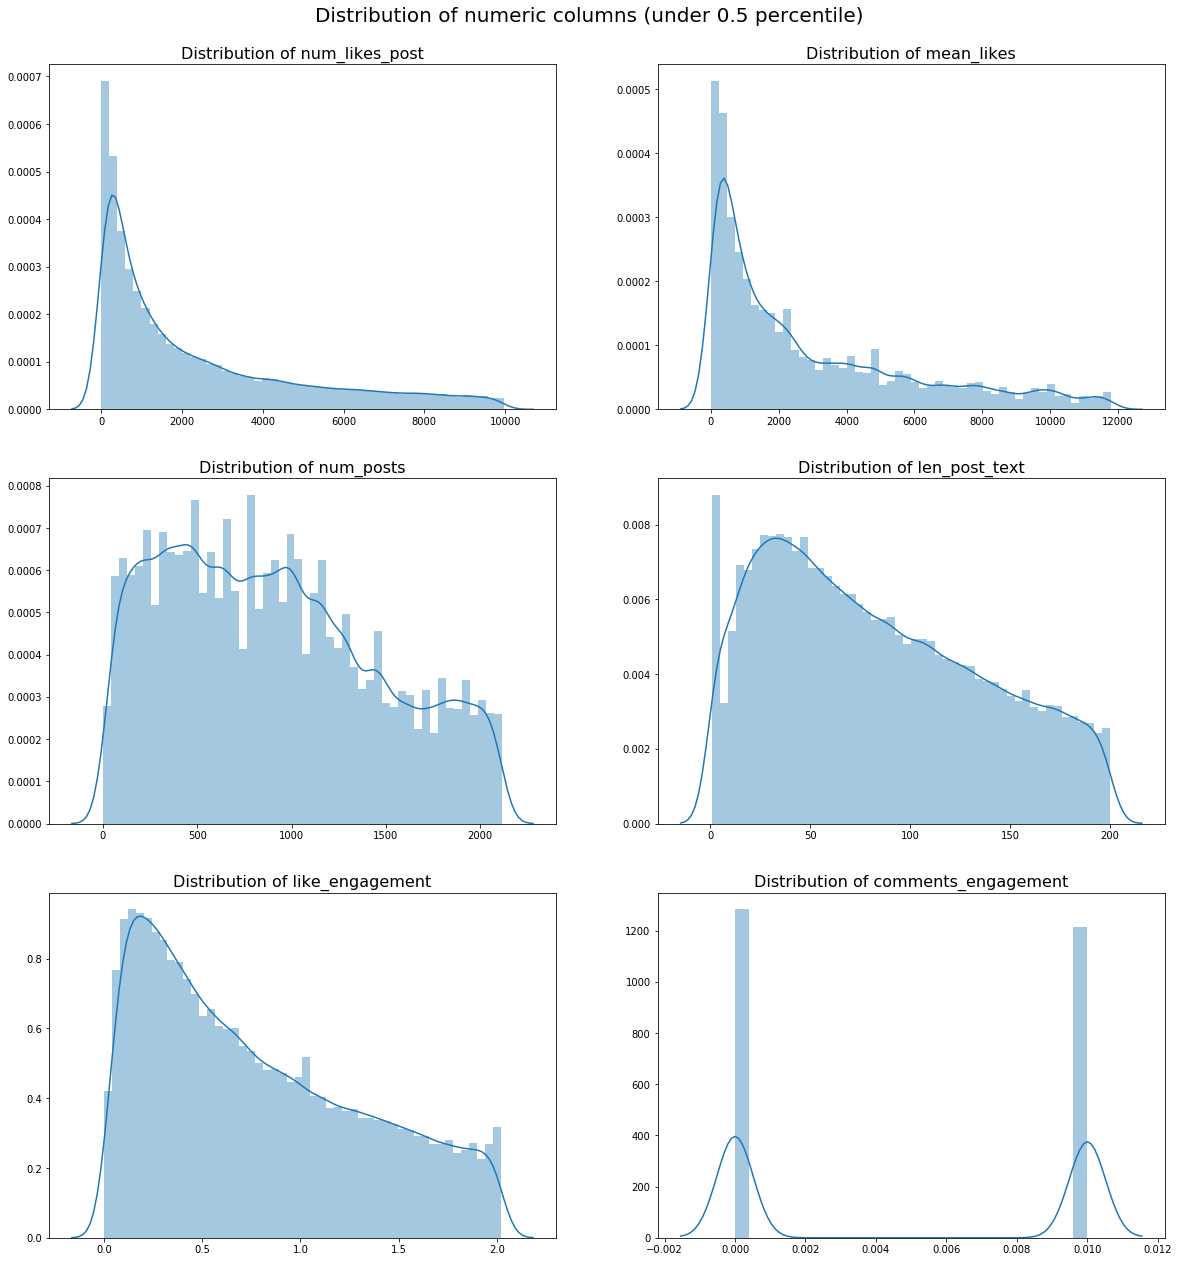

In [9]:
# Zoomed distribution of numeric columns
# under 60% percentile
numeric_columns = ['num_likes_post','mean_likes','num_posts','len_post_text',
                   'like_engagement','comments_engagement']
nrows = int(np.ceil(len(numeric_columns)/2))
fig,ax = plt.subplots(ncols=2,nrows=nrows, figsize=(20,20))
ax = ax.ravel()
for i,column in enumerate(numeric_columns):
    sns.distplot(main_df[main_df[column] < main_df[column].quantile(q=0.6)][column],ax=ax[i])
    ax[i].set_xlabel(' ')
    ax[i].set_title(f'Distribution of {column}',fontsize=16)
    plt.suptitle('Distribution of numeric columns (under 0.5 percentile)',fontsize=20)
    fig.subplots_adjust(top=0.94);

Much more posts got likes between 0 and 2000. Mean likes in profile based on scraped post of the profile also is between 0 and 2000. Number of posts in a profile usually between 0 to 1500.

Many posts don't have caption or have caption with less than 50 number of character in it.

Like and comment engagement (number of likes (or comments) divided by number of followers in percents) is very small, especially for comments. Like engagement is mostly between 0 and 0.5% only.

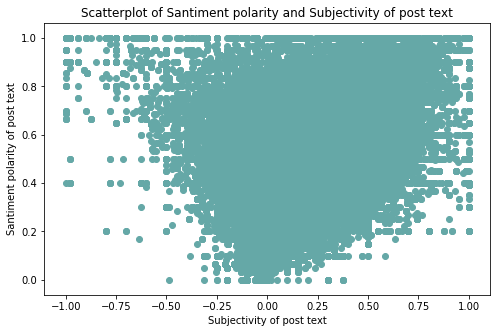

In [10]:
# Scatterplot of polarity and Subjectivity of post text
plt.figure(figsize=(8,5))
plt.scatter(main_df['polarity_post_txt'],main_df['subjectivity_post_txt'],c='#65a8a7')
plt.ylabel('Santiment polarity of post text')
plt.xlabel('Subjectivity of post text')
plt.title('Scatterplot of Santiment polarity and Subjectivity of post text');

There is a not very pronounced linear relationship between polarity and subjectivity: the positive text post the higher subjectivity.

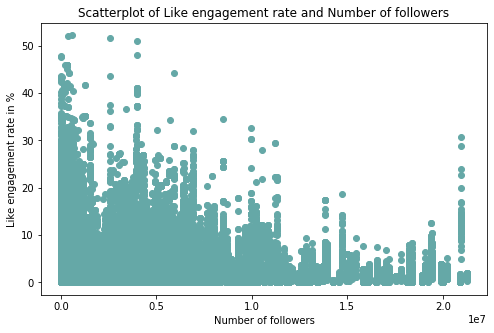

In [24]:
# Scatterplot of Like engagement rate and Number of followers
plt.figure(figsize=(8,5))
without_outliers = main_df[(main_df['num_followers'] <main_df['num_followers'].quantile(0.99)) &
                        (main_df['like_engagement'] <main_df['like_engagement'].quantile(0.9999))]
plt.scatter(without_outliers['num_followers'],without_outliers['like_engagement'],c='#65a8a7')
plt.ylabel('Like engagement rate in %')
plt.xlabel('Number of followers')
plt.title('Scatterplot of Like engagement rate and Number of followers');

Usually, the fewer followers - the higher like engagement rate. 

In [73]:
# Creating a function for boxplots
def boxplot_by_column(list_of_y,list_of_x,figsize=(10,15)):
    fig,ax = plt.subplots(ncols=len(list_of_x),nrows=len(list_of_y),figsize=figsize)
    for i,x in enumerate(list_of_x):
        for j,y in enumerate(list_of_y):
            df = main_df[main_df[y] < main_df[y].quantile(0.95)]
            sns.boxplot(y=y, x=x, data=df, width=0.5,
                             palette="BrBG",ax=ax[j,i])
            max_likes = df['num_likes_post'].max()
            ax[j,i].set_title(f'{y} by {x}',fontsize=18)
            plt.tight_layout();

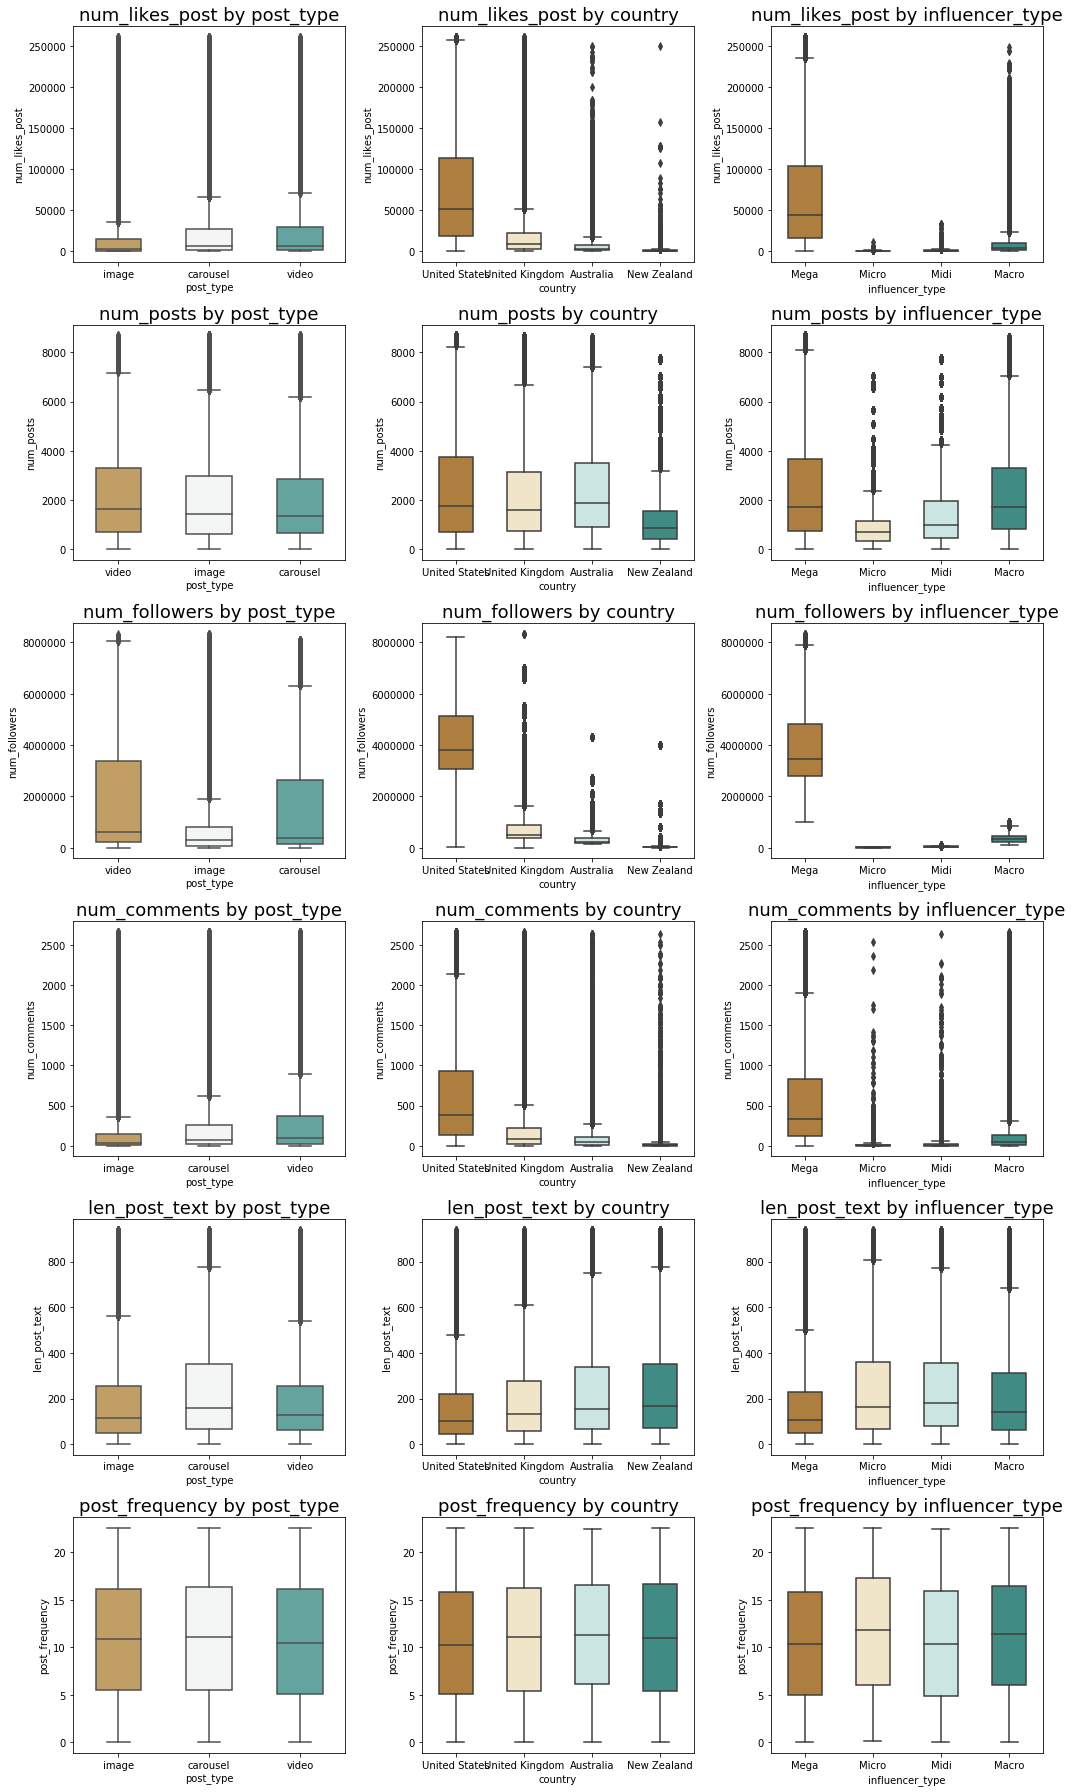

In [74]:
boxplot_by_column(['num_likes_post','num_posts','num_followers',
        'num_comments','len_post_text','post_frequency'],['post_type','country','influencer_type'],figsize=(15,25))

From the above we can notice that video and carousel types of post get more likes and only one image. More users of Instagram publish posts with video and single images than with carousel. Posts with images has much less followers (or accounts with high number of followers publish posts with video and carousel more). Under posts with video and carousel people tend to leave comments more than under the post with single image. Under the carousel post users usually write much more text.

United Stated profiles have more likes, comments and followers (I suppose it is because US has much more Instagram users and population overall). Interestingly, that US use less characters in their post caption (mostly under 200), but New Zealand and Australian users prefer linger caption (mostly under about 360). 

In terms of type of influencers, Mega influencers have more posts in their accounts, the smallest number of posts have beginner Micro influencers. Usually Micro and Midi influencers write longer captions than Macro and especially Mega.

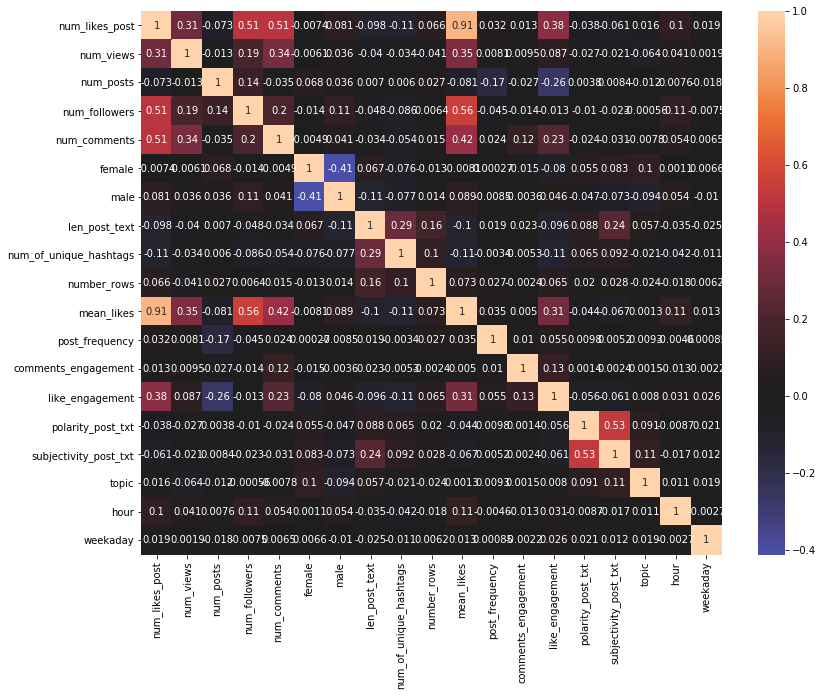

In [22]:
# Looking for correlations
plt.figure(figsize=(13,10))
sns.heatmap(main_df.corr(),annot=True,center=0);

Positive moderate cottelations are between mean number of likes and number of followers, and number of likes and number of followers.

C:\Users\anpej\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


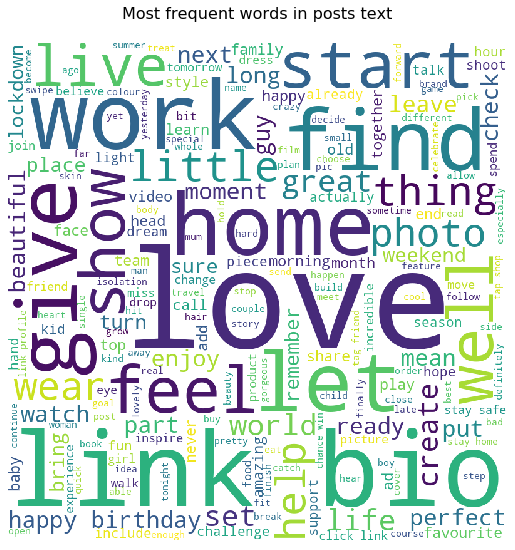

In [33]:
# Word cloud of posts caption (text)
post_string = pd.Series()
post_string = main_df['post_text'].apply(lambda row: ' '.join(word for word in row))

fig = plt.figure(figsize=(15,8))

stopwords = set(STOPWORDS)
stopwords.update(['the','in','you','to','at','this is','it','so','wa'])

# Converting separate documents into one string for each subreddit and creating wordclouds
post_text = ''
post_text += " ".join(word for word in post_string)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = list(STOPWORDS),
                min_font_size = 5).generate(post_text) 

# Plotting the WordCloud images
plt.imshow(wordcloud)

plt.title('Most frequent words in posts text\n',fontsize=16)

plt.axis("off") 
plt.tight_layout(pad = 2) 
  
plt.show()

Most common words and phrases are: link in bio, love, home, work, life, show, give, feel.

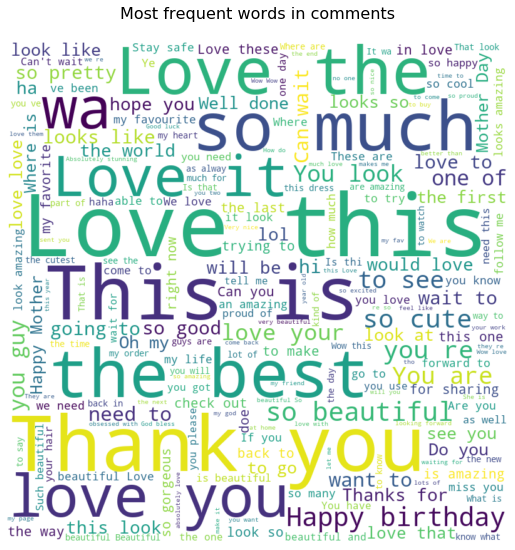

In [35]:
# Most frequent words in comments
words = main_df['comments']

stopwords = set(STOPWORDS)
stopwords.update(['the','in','you','to','at','this is','it','so'])

fig = plt.figure(figsize=(15,8))

# Converting separate documents into one string for each subreddit and creating wordclouds
comments = ''
comments += " ".join(word for word in words)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = list(STOPWORDS),
                min_font_size = 5).generate(comments) 

# Plotting the WordCloud images
plt.imshow(wordcloud,interpolation="bilinear")

plt.title('Most frequent words in comments\n',fontsize=16)

plt.axis("off") 
plt.tight_layout(pad = 2) 
  
plt.show()

Most common words and phrases are: love this, the best, love you, thank you.

C:\Users\anpej\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


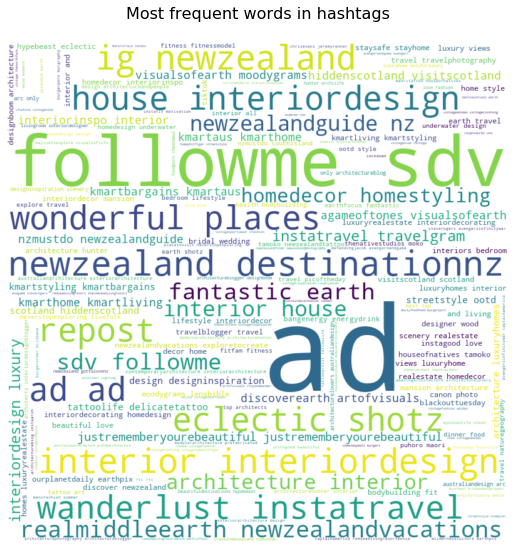

In [5]:
# Most frequent words in hashtags
hashtags_string = pd.Series()
hashtags_string = main_df['hashtags'].apply(lambda row: ' '.join(row))

stopwords = set(STOPWORDS)
stopwords.update(['the','in','you','to','at','this is','it','so'])

fig = plt.figure(figsize=(15,8))
# Converting separate documents into one string for each subreddit and creating wordclouds
hashtags = ''
hashtags += " ".join(str(word) for word in hashtags_string if len(word)>0)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = list(STOPWORDS),
                min_font_size = 5).generate(hashtags) 

# Plotting the WordCloud images
plt.imshow(wordcloud,interpolation="bilinear")

plt.title('Most frequent words in hashtags\n',fontsize=16)

plt.axis("off") 
plt.tight_layout(pad = 2) 
  
plt.show()

In [29]:
# Most frequent hashtags
# Initializing two vectorizers
cvec = CountVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = stop_words,
                             max_features = None)

# CountVectorizer
post_text = main_df['hashtags']
post_text = post_text.apply(lambda row: ' '.join(row))
text_features_cvec = cvec.fit_transform(post_text)


# Creating df from the model
post_text_all = sorted(list(zip(cvec.get_feature_names(), 
                                         text_features_cvec.sum(0).getA1())),
                            key=lambda x: x[1], reverse=True)
# Displaying top most frequent words from 
print('Number of unique words what on photo:',len(post_text_all))
post_text_all[:20]

Number of unique words what on photo: 94347


[('newzealand', 4246),
 ('love', 2904),
 ('stayhome', 2623),
 ('fashion', 2508),
 ('travel', 2397),
 ('design', 2258),
 ('ad', 2179),
 ('style', 2082),
 ('interiordesign', 2043),
 ('australia', 1886),
 ('nz', 1884),
 ('interior', 1873),
 ('architecture', 1804),
 ('nature', 1618),
 ('art', 1603),
 ('covid', 1569),
 ('home', 1519),
 ('ootd', 1500),
 ('fitness', 1489),
 ('homedecor', 1483)]

Most common words and phrases are: stayhome, love, followme, ad, hashtags about Australia and interior and design.

C:\Users\anpej\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


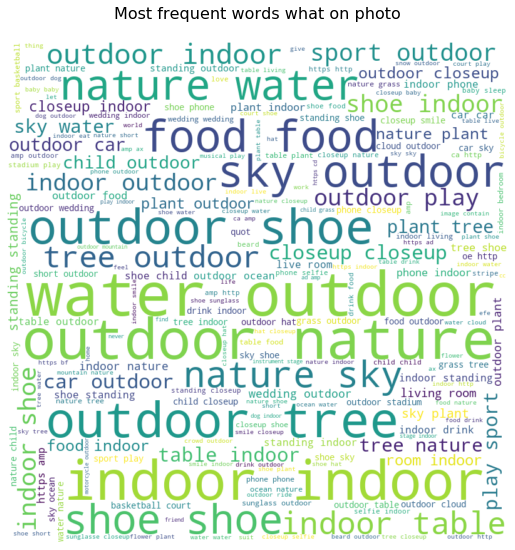

In [76]:
# 'Most frequent words what on photo
photo_string = pd.Series()
photo_string = main_df['what_on_photo'].apply(lambda row: ' '.join(row))

stopwords = set(STOPWORDS)
stopwords.update(['the','in','you','to','at','this is','it','so','wa'])

fig = plt.figure(figsize=(15,8))

# Converting separate documents into one string for each subreddit and creating wordclouds
on_photo = ''
on_photo += " ".join(word for word in photo_string)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = list(STOPWORDS),
                min_font_size = 5).generate(on_photo) 

# Plotting the WordCloud images
plt.imshow(wordcloud,interpolation="bilinear")

plt.title('Most frequent words what on photo\n',fontsize=16)


plt.axis("off") 
plt.tight_layout(pad = 2) 
  
plt.show()

Most common words and phrases are: indoor, outdoor, nature, sky.

In [83]:
# What is on photo most frequent things
# Initializing two vectorizers
cvec = CountVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = stop_words,
                             max_features = None)

# CountVectorizer
post_text = main_df['what_on_photo']
post_text = post_text.apply(lambda row: ' '.join(row))
text_features_cvec = cvec.fit_transform(post_text)


# Creating df from the model
post_text_all = sorted(list(zip(cvec.get_feature_names(), 
                                         text_features_cvec.sum(0).getA1())),
                            key=lambda x: x[1], reverse=True)
# Displaying top most frequent words from 
print('Number of unique words what on photo:',len(post_text_all))
post_text_all[:20]

Number of unique words what on photo 11666


[('outdoor', 45467),
 ('indoor', 22305),
 ('shoe', 14442),
 ('nature', 13697),
 ('water', 8873),
 ('sky', 8491),
 ('closeup', 8013),
 ('tree', 7898),
 ('food', 7560),
 ('plant', 4700),
 ('table', 4498),
 ('standing', 3698),
 ('child', 3484),
 ('play', 3280),
 ('https', 3005),
 ('amp', 2971),
 ('car', 2970),
 ('sport', 2788),
 ('phone', 2212),
 ('wedding', 1555)]